In [1]:
%cd /Users/user/Desktop/IWF-DNN/data2DComplex
%pwd
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import print_function
import scipy.io as sio
import time
from sklearn.cross_validation import train_test_split
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

/Users/user/Desktop/IWF-DNN/data2DComplex


/Users/user/anaconda2/envs/haha/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [2]:
DateLocation='MIMO50000_3.mat'
Data = sio.loadmat(DateLocation)#load data
Xdata=Data['X']
Ydata=Data['Y']
Xdata = np.transpose(Xdata)
Ydata = np.transpose(Ydata)
X = np.column_stack((np.real(Xdata), np.imag(Xdata)))
Y = np.column_stack((np.real(Ydata), np.imag(Ydata)))
x_train, x_val ,y_train, y_val= train_test_split(X, Y, test_size=0.1)
DateLocation2='MIMO5000_3.mat'
DataTest10000 = sio.loadmat(DateLocation2)#load data
Xtest=DataTest10000['X']
Xtest = np.transpose(Xtest)
Ytest=DataTest10000['Y']
Ytest = np.transpose(Ytest)
Xtest = np.column_stack((np.real(Xtest), np.imag(Xtest)))
Ytest = np.column_stack((np.real(Ytest), np.imag(Ytest)))

In [2]:
def plot_whole(dict_data):
    fig_1 = plt.figure(figsize=(12,4))
    ax_1 = fig_1.add_subplot(1,2,1)
    ax_2 = fig_1.add_subplot(1,2,2)
    k =int(0)
    for data in dict_data.values():
        ax_1.plot(np.arange(0,len(data['loss'])),data['loss'], label=list(dict_data.keys())[k])
        ax_2.plot(np.arange(0,len(data['val_loss'])),data['val_loss'], label=list(dict_data.keys())[k])
        k += 1
    ax_1.legend(loc=0)
    
    ax_2.legend(loc=0)
    ax_1.set_xlabel('Epoch number')
    ax_1.set_ylabel('error(train)')
    ax_2.set_xlabel('Epoch number')
    ax_2.set_ylabel('error(valid)')
    fig_1.savefig('err.pdf')
    return fig_1, ax_1, ax_2
dictData={}

In [4]:
# lr=0.0001
from keras.layers import Input, Dense
from keras.callbacks import TensorBoard
from keras.models import Model
import keras
from keras.models import Sequential
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from sklearn.cross_validation import train_test_split
model4layers = Sequential()
# activation=keras.layers.ReLU()
model4layers.add(Dense(480, input_dim=24, activation='relu'))
model4layers.add(Dense(240, activation='relu'))
model4layers.add(Dense(120, activation='relu'))
model4layers.add(Dense(60, activation='relu'))
model4layers.add(Dense(24, activation='linear'))
model4layers.summary()
adam=keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)
model4layers.compile(loss='mse', optimizer='adam')
hist=model4layers.fit(x_train, y_train,
                epochs=200,
                batch_size=50,
                shuffle=True,
                validation_data=(x_val, y_val),callbacks=[TensorBoard(log_dir='/tmp/autoencod')])
# model.fit(x_train, y_train, epochs=100, verbose=0)
dictData['DNN-480-240-120-60']=hist.history

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 480)               12000     
_________________________________________________________________
dense_2 (Dense)              (None, 240)               115440    
_________________________________________________________________
dense_3 (Dense)              (None, 120)               28920     
_________________________________________________________________
dense_4 (Dense)              (None, 60)                7260      
_________________________________________________________________
dense_5 (Dense)              (None, 24)                1464      
Total params: 165,084
Trainable params: 165,084
Non-trainable params: 0
_________________________________________________________________
Train on 45000 samples, validate on 5000 samples
Epoch 1/200
45000/45000 [==============================] - 6s 132us/step - loss: 0.8191

45000/45000 [==============================] - 5s 121us/step - loss: 0.0313 - val_loss: 0.2335
Epoch 143/200
45000/45000 [==============================] - 5s 121us/step - loss: 0.0286 - val_loss: 0.2328
Epoch 144/200
45000/45000 [==============================] - 6s 123us/step - loss: 0.0278 - val_loss: 0.2347
Epoch 145/200
45000/45000 [==============================] - 5s 122us/step - loss: 0.0312 - val_loss: 0.2305
Epoch 146/200
45000/45000 [==============================] - 6s 123us/step - loss: 0.0301 - val_loss: 0.2351
Epoch 147/200
45000/45000 [==============================] - 6s 124us/step - loss: 0.0280 - val_loss: 0.2300
Epoch 148/200
45000/45000 [==============================] - 6s 124us/step - loss: 0.0296 - val_loss: 0.2314
Epoch 149/200
45000/45000 [==============================] - 6s 123us/step - loss: 0.0292 - val_loss: 0.2356
Epoch 150/200
45000/45000 [==============================] - 6s 125us/step - loss: 0.0267 - val_loss: 0.2265
Epoch 151/200
45000/45000 [======

(<Figure size 864x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2a2c3908>)

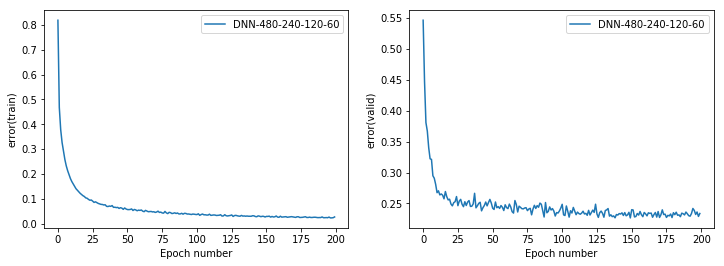

In [5]:
plot_whole(dictData)

In [7]:
from keras.layers import Input, Dense
from keras.callbacks import TensorBoard
from keras.models import Model
import keras
from keras.models import Sequential
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from sklearn.cross_validation import train_test_split
model5layers2 = Sequential()
# activation=keras.layers.ReLU()

model5layers2.add(Dense(480, input_dim=24, activation='relu'))
model5layers2.add(Dense(360, activation='relu'))
model5layers2.add(Dense(240, activation='relu'))
model5layers2.add(Dense(120, activation='relu'))
model5layers2.add(Dense(60, activation='relu'))
model5layers2.add(Dense(24, activation='linear'))
model5layers2.summary()
adam=keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)
model5layers2.compile(loss='mse', optimizer='adam')
hist=model5layers2.fit(x_train, y_train,
                epochs=200,
                batch_size=50,
                shuffle=True,
                validation_data=(x_val, y_val),callbacks=[TensorBoard(log_dir='/tmp/autoenco')])
# model.fit(x_train, y_train, epochs=100, verbose=0)
dictData['DNN-480-360-240-120-60']=hist.history

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 480)               12000     
_________________________________________________________________
dense_13 (Dense)             (None, 360)               173160    
_________________________________________________________________
dense_14 (Dense)             (None, 240)               86640     
_________________________________________________________________
dense_15 (Dense)             (None, 120)               28920     
_________________________________________________________________
dense_16 (Dense)             (None, 60)                7260      
_________________________________________________________________
dense_17 (Dense)             (None, 24)                1464      
Total params: 309,444
Trainable params: 309,444
Non-trainable params: 0
_________________________________________________________________
Trai

45000/45000 [==============================] - 8s 179us/step - loss: 0.0327 - val_loss: 0.2479
Epoch 67/200
45000/45000 [==============================] - 8s 179us/step - loss: 0.0402 - val_loss: 0.2558
Epoch 68/200
45000/45000 [==============================] - 8s 178us/step - loss: 0.0361 - val_loss: 0.2535
Epoch 69/200
45000/45000 [==============================] - 8s 178us/step - loss: 0.0340 - val_loss: 0.2303
Epoch 70/200
45000/45000 [==============================] - 8s 178us/step - loss: 0.0292 - val_loss: 0.2431
Epoch 71/200
45000/45000 [==============================] - 8s 182us/step - loss: 0.0395 - val_loss: 0.2527
Epoch 72/200
45000/45000 [==============================] - 8s 180us/step - loss: 0.0348 - val_loss: 0.2392
Epoch 73/200
45000/45000 [==============================] - 8s 181us/step - loss: 0.0308 - val_loss: 0.2395
Epoch 74/200
45000/45000 [==============================] - 8s 182us/step - loss: 0.0386 - val_loss: 0.2401
Epoch 75/200
45000/45000 [===============

(<Figure size 864x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2ba54f60>)

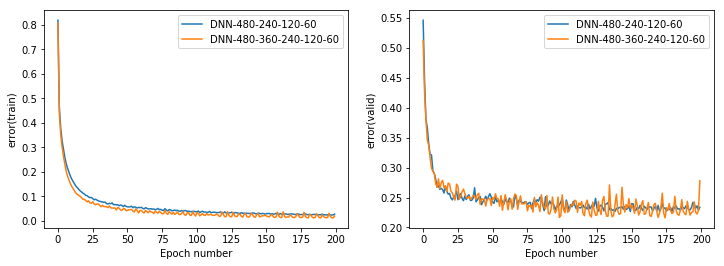

In [8]:
plot_whole(dictData)

In [9]:
from keras.layers import Input, Dense
from keras.callbacks import TensorBoard
from keras.models import Model
import keras
from keras.models import Sequential
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from sklearn.cross_validation import train_test_split
model6layers = Sequential()
# activation=keras.layers.ReLU()

model6layers.add(Dense(600, input_dim=24, activation='relu'))
model6layers.add(Dense(480, activation='relu'))
model6layers.add(Dense(360, activation='relu'))
model6layers.add(Dense(240, activation='relu'))
model6layers.add(Dense(120, activation='relu'))
model6layers.add(Dense(60, activation='relu'))
model6layers.add(Dense(24, activation='linear'))
model6layers.summary()
adam=keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)
model6layers.compile(loss='mse', optimizer='adam')
hist=model6layers.fit(x_train, y_train,
                epochs=200,
                batch_size=50,
                shuffle=True,
                validation_data=(x_val, y_val),callbacks=[TensorBoard(log_dir='/tmp/autoen')])
# model.fit(x_train, y_train, epochs=100, verbose=0)
dictData['DNN-600-480-360-240-120-60']=hist.history

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 600)               15000     
_________________________________________________________________
dense_19 (Dense)             (None, 480)               288480    
_________________________________________________________________
dense_20 (Dense)             (None, 360)               173160    
_________________________________________________________________
dense_21 (Dense)             (None, 240)               86640     
_________________________________________________________________
dense_22 (Dense)             (None, 120)               28920     
_________________________________________________________________
dense_23 (Dense)             (None, 60)                7260      
_________________________________________________________________
dense_24 (Dense)             (None, 24)                1464      
Total para

Epoch 139/200
45000/45000 [==============================] - 12s 269us/step - loss: 0.0395 - val_loss: 0.2390
Epoch 140/200
45000/45000 [==============================] - 12s 269us/step - loss: 0.0182 - val_loss: 0.2189
Epoch 141/200
45000/45000 [==============================] - 12s 271us/step - loss: 0.0118 - val_loss: 0.2159
Epoch 142/200
45000/45000 [==============================] - 12s 269us/step - loss: 0.0111 - val_loss: 0.2176
Epoch 143/200
45000/45000 [==============================] - 12s 269us/step - loss: 0.0276 - val_loss: 0.2556
Epoch 144/200
45000/45000 [==============================] - 12s 270us/step - loss: 0.0194 - val_loss: 0.2241
Epoch 145/200
45000/45000 [==============================] - 12s 270us/step - loss: 0.0121 - val_loss: 0.2227
Epoch 146/200
45000/45000 [==============================] - 12s 270us/step - loss: 0.0117 - val_loss: 0.2275
Epoch 147/200
45000/45000 [==============================] - 12s 270us/step - loss: 0.0168 - val_loss: 0.2510
Epoch 148/

(<Figure size 864x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2caa4320>)

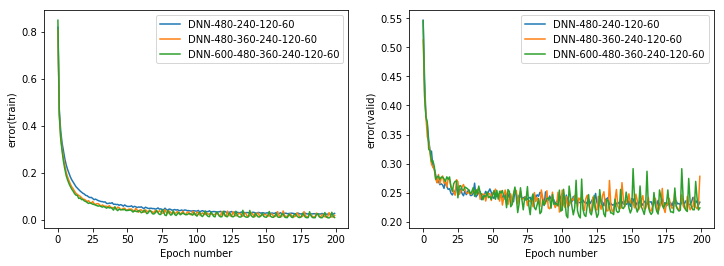

In [10]:
plot_whole(dictData)

In [11]:
from keras.layers import Input, Dense
from keras.callbacks import TensorBoard
from keras.models import Model
import keras
from keras.models import Sequential
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from sklearn.cross_validation import train_test_split
model7layers = Sequential()
# activation=keras.layers.ReLU()

model7layers.add(Dense(720, input_dim=24, activation='relu'))
model7layers.add(Dense(600, activation='relu'))
model7layers.add(Dense(480, activation='relu'))
model7layers.add(Dense(360, activation='relu'))
model7layers.add(Dense(240, activation='relu'))
model7layers.add(Dense(120, activation='relu'))
model7layers.add(Dense(60, activation='relu'))
model7layers.add(Dense(24, activation='linear'))
model7layers.summary()
adam=keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)
model7layers.compile(loss='mse', optimizer='adam')
hist=model7layers.fit(x_train, y_train,
                epochs=200,
                batch_size=50,
                shuffle=True,
                validation_data=(x_val, y_val),callbacks=[TensorBoard(log_dir='/tmp/autoe')])
# model.fit(x_train, y_train, epochs=100, verbose=0)
dictData['DNN-720-600-480-360-240-120-60']=hist.history

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 720)               18000     
_________________________________________________________________
dense_26 (Dense)             (None, 600)               432600    
_________________________________________________________________
dense_27 (Dense)             (None, 480)               288480    
_________________________________________________________________
dense_28 (Dense)             (None, 360)               173160    
_________________________________________________________________
dense_29 (Dense)             (None, 240)               86640     
_________________________________________________________________
dense_30 (Dense)             (None, 120)               28920     
_________________________________________________________________
dense_31 (Dense)             (None, 60)                7260      
__________

Epoch 63/200
45000/45000 [==============================] - 21s 462us/step - loss: 0.0279 - val_loss: 0.2573
Epoch 64/200
45000/45000 [==============================] - 21s 462us/step - loss: 0.0418 - val_loss: 0.2817
Epoch 65/200
45000/45000 [==============================] - 21s 461us/step - loss: 0.0334 - val_loss: 0.2636
Epoch 66/200
45000/45000 [==============================] - 21s 462us/step - loss: 0.0252 - val_loss: 0.2471
Epoch 67/200
45000/45000 [==============================] - 21s 463us/step - loss: 0.0333 - val_loss: 0.2802
Epoch 68/200
45000/45000 [==============================] - 21s 461us/step - loss: 0.0464 - val_loss: 0.2797
Epoch 69/200
45000/45000 [==============================] - 21s 461us/step - loss: 0.0333 - val_loss: 0.2681
Epoch 70/200
45000/45000 [==============================] - 21s 460us/step - loss: 0.0237 - val_loss: 0.2384
Epoch 71/200
45000/45000 [==============================] - 21s 459us/step - loss: 0.0204 - val_loss: 0.2302
Epoch 72/200
45000/

Epoch 138/200
45000/45000 [==============================] - 21s 463us/step - loss: 0.0122 - val_loss: 0.2350
Epoch 139/200
45000/45000 [==============================] - 21s 463us/step - loss: 0.0099 - val_loss: 0.2364
Epoch 140/200
45000/45000 [==============================] - 21s 460us/step - loss: 0.0104 - val_loss: 0.2323
Epoch 141/200
45000/45000 [==============================] - 21s 462us/step - loss: 0.0121 - val_loss: 0.2724
Epoch 142/200
45000/45000 [==============================] - 21s 461us/step - loss: 0.0440 - val_loss: 0.2719
Epoch 143/200
45000/45000 [==============================] - 21s 460us/step - loss: 0.0218 - val_loss: 0.2536
Epoch 144/200
45000/45000 [==============================] - 21s 461us/step - loss: 0.0131 - val_loss: 0.2383
Epoch 145/200
45000/45000 [==============================] - 21s 459us/step - loss: 0.0100 - val_loss: 0.2360
Epoch 146/200
45000/45000 [==============================] - 21s 459us/step - loss: 0.0101 - val_loss: 0.2372
Epoch 147/

(<Figure size 864x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2dd6c6a0>)

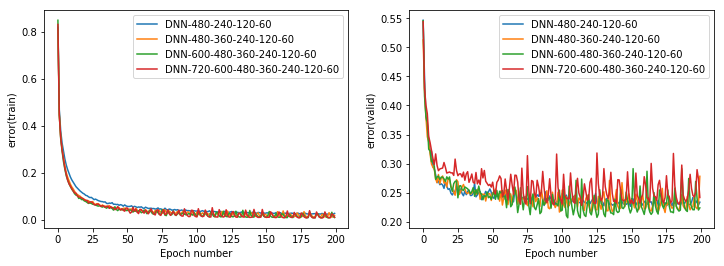

In [12]:
plot_whole(dictData)

In [17]:
from keras.layers import Input, Dense,Dropout
from keras.callbacks import TensorBoard
from keras.models import Model
import keras
from keras.models import Sequential
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from sklearn.cross_validation import train_test_split
model7layers = Sequential()
# activation=keras.layers.ReLU()
rate=0.3
model7layers.add(Dense(720, input_dim=24, activation='relu'))
# keras.layers.core.Dropout(rate, noise_shape=None, seed=None)
model7layers.add(Dropout(rate))
model7layers.add(Dense(600, activation='relu'))
model7layers.add(Dropout(rate))
model7layers.add(Dense(480, activation='relu'))
model7layers.add(Dropout(rate))
model7layers.add(Dense(360, activation='relu'))
model7layers.add(Dropout(rate))
model7layers.add(Dense(240, activation='relu'))
model7layers.add(Dropout(rate))
model7layers.add(Dense(120, activation='relu'))
model7layers.add(Dense(60, activation='relu'))
model7layers.add(Dense(24, activation='linear'))
model7layers.summary()
adam=keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)
model7layers.compile(loss='mse', optimizer='adam')
hist=model7layers.fit(x_train, y_train,
                epochs=200,
                batch_size=50,
                shuffle=True,
                validation_data=(x_val, y_val),callbacks=[TensorBoard(log_dir='/tmp/aut')])
# model.fit(x_train, y_train, epochs=100, verbose=0)
dictData['DNN-720-600-480-360-240-120-60_Dropout0.3']=hist.history

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 720)               18000     
_________________________________________________________________
dropout_6 (Dropout)          (None, 720)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 600)               432600    
_________________________________________________________________
dropout_7 (Dropout)          (None, 600)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 480)               288480    
_________________________________________________________________
dropout_8 (Dropout)          (None, 480)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 360)               173160    
__________

Epoch 57/200
45000/45000 [==============================] - 23s 516us/step - loss: 0.3533 - val_loss: 0.2976
Epoch 58/200
45000/45000 [==============================] - 23s 515us/step - loss: 0.3514 - val_loss: 0.3025
Epoch 59/200
45000/45000 [==============================] - 23s 515us/step - loss: 0.3500 - val_loss: 0.3034
Epoch 60/200
45000/45000 [==============================] - 23s 516us/step - loss: 0.3490 - val_loss: 0.2911
Epoch 61/200
45000/45000 [==============================] - 23s 518us/step - loss: 0.3464 - val_loss: 0.3059
Epoch 62/200
45000/45000 [==============================] - 23s 516us/step - loss: 0.3488 - val_loss: 0.2998
Epoch 63/200
45000/45000 [==============================] - 23s 514us/step - loss: 0.3448 - val_loss: 0.3025
Epoch 64/200
45000/45000 [==============================] - 23s 518us/step - loss: 0.3458 - val_loss: 0.3052
Epoch 65/200
45000/45000 [==============================] - 23s 515us/step - loss: 0.3421 - val_loss: 0.3064
Epoch 66/200
45000/

Epoch 132/200
45000/45000 [==============================] - 23s 519us/step - loss: 0.2987 - val_loss: 0.3049
Epoch 133/200
45000/45000 [==============================] - 23s 516us/step - loss: 0.3010 - val_loss: 0.3083
Epoch 134/200
45000/45000 [==============================] - 23s 521us/step - loss: 0.2996 - val_loss: 0.3095
Epoch 135/200
45000/45000 [==============================] - 23s 519us/step - loss: 0.3000 - val_loss: 0.3036
Epoch 136/200
45000/45000 [==============================] - 23s 519us/step - loss: 0.2968 - val_loss: 0.3054
Epoch 137/200
45000/45000 [==============================] - 23s 521us/step - loss: 0.2993 - val_loss: 0.3069
Epoch 138/200
45000/45000 [==============================] - 23s 520us/step - loss: 0.2977 - val_loss: 0.3002
Epoch 139/200
45000/45000 [==============================] - 23s 519us/step - loss: 0.3024 - val_loss: 0.3082
Epoch 140/200
45000/45000 [==============================] - 24s 525us/step - loss: 0.2994 - val_loss: 0.3076
Epoch 141/

(<Figure size 864x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a30f56ac8>)

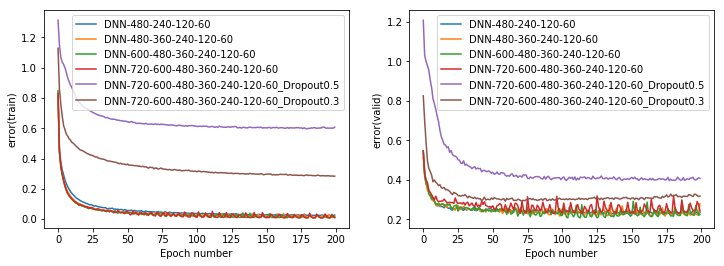

In [19]:
np.savez( "0731highlayers_Results.npz", data=dictData )
d = np.load( "0731highlayers_Results.npz" )
for sturctuers in sorted( d.items() ):
    val = sturctuers[1][()]
plot_whole(val)

In [ ]:
model6layers

In [20]:
def obj_sum_rate(xtest, y_pred,M,N,K, samples):
    # H ： sampels*12
    sum_rate=[]
    for i in range(samples):
        rate_nn=0
        H=np.reshape(xtest[i,:],[K,M,N])
        pnn=np.reshape(y_pred[i,:],[K,M,N])      
        for j in range(K):
            if j==0:
                rate_nn = rate_nn+np.real(np.log2( \
                                                  np.linalg.det(np.eye(N)+np.dot(np.dot(H[j,:,:].conj(),np.transpose(pnn[j,:,:])), np.transpose(H[j,:,:])))))
            else:
                pnn[j,:,:]=np.transpose(pnn[j,:,:])+pnn[j-1,:,:]
                rate_nn = rate_nn+np.real(np.log2(np.linalg.det(np.eye(N)+np.dot(np.dot(H[j,:,:].conj(), pnn[j,:,:]), np.transpose(H[j,:,:]))) \
                                                  /np.linalg.det((np.eye(N)+np.dot(np.dot(H[j,:,:].conj(),pnn[j-1,:,:]),np.transpose(H[j,:,:]))))))
                
        sum_rate.append(rate_nn)
    return sum_rate

In [21]:
import time
def power(xtest, y_pred,M,N,K, samples):
    # H ： sampels*12
    powerall=[]
    for i in range(samples):
        power=0
        H=np.reshape(xtest[i,:],[K,M,N])
#         print(y_pred[i,:])
        pnn=np.reshape(y_pred[i,:],[K,M,N])  
#         print(pnn)
        for j in range(K):
            power=power+np.trace(np.transpose(pnn[j,:,:]))
        powerall.append(np.real(power))
    return powerall

def test(X, model_location, save_name, n_input, n_output, n_hidden_1 = 200, n_hidden_2 = 80, n_hidden_3 = 80, n_hidden_4 = 40,binary=0):
    tf.reset_default_graph()
    x = tf.placeholder("float", [None, n_input])
    is_train = tf.placeholder("bool")
    input_keep_prob = tf.placeholder(tf.float32)
    hidden_keep_prob = tf.placeholder(tf.float32)
    weights, biases = ini_weights4(n_input, n_hidden_1, n_hidden_2, n_hidden_3, n_hidden_4, n_output)
    pred = multilayer_perceptron4(x, weights, biases, input_keep_prob, hidden_keep_prob)
    saver = tf.train.Saver()
    with tf.Session() as sess:
        saver.restore(sess, model_location)
        start_time = time.time()
        y_pred = sess.run(pred, feed_dict={x: X, input_keep_prob: 1, hidden_keep_prob: 1, is_train: False})
        testtime = time.time() - start_time
        # print("testing time: %0.2f s" % testtime)
        if binary==1:
            y_pred[y_pred >= 0.5] = 1
            y_pred[y_pred < 0.5] = 0
        sio.savemat(save_name, {'pred': y_pred})
    return y_pred

def DABtoComplex(XX, dim):
    size=XX.shape[1]
    X=np.empty( (XX.shape[0], dim), dtype= np.complex128 )
    X.real[:,:]=XX[:,0:dim]
    X.imag[:,:]=XX[:,dim:2*dim]
    return X
# def obj_sum_rate(xtest, y_pred,M,N,K, samples):
#     # H ： sampels*12
#     sum_rate=[]
#     for i in range(samples):
#         rate_nn=0
#         H=np.reshape(xtest[i,:],[K,M,N])
#         pnn=np.reshape(y_pred[i,:],[K,M,N])      
#         for j in range(K):
#             if j==0:
#                 rate_nn = rate_nn+np.real(np.log2( \
#                                                   np.linalg.det(np.eye(M)+np.dot(np.dot(np.transpose(H[j,:,:]),np.transpose(pnn[j,:,:])), H[j,:,:].conj()))))
#             else:
#                 pnn[j,:,:]=np.transpose(pnn[j,:,:])+pnn[j-1,:,:]
#                 rate_nn = rate_nn+np.real(np.log2(np.linalg.det(np.eye(M)+np.dot(np.dot(np.transpose(H[j,:,:]), pnn[j,:,:]), H[j,:,:].conj())) \
#                                                   /np.linalg.det((np.eye(M)+np.dot(np.dot(np.transpose(H[j,:,:]),pnn[j-1,:,:]),H[j,:,:].conj())))))
                
#         sum_rate.append(rate_nn)
#     return sum_rate



def CDF_Plot(sumRate1, sumRate2, label1= 'DNN', label2= 'IWF'):
    a = np.array(sumRate1) # your array of numbers
    num_bins1 = np.linspace(0, max(sumRate1), 50)
    counts1, bin_edges1 = np.histogram(a, bins='auto', normed=True)
    cdf1 = np.cumsum(counts1*np.diff(bin_edges1))

    b = np.array(sumRate2) # your array of numbers
    num_bins2 = np.linspace(0, max(sumRate2), 50)
    counts2, bin_edges2 = np.histogram(b, bins='auto', normed=True)
    cdf2 = np.cumsum(counts2*np.diff(bin_edges2))
    
    plt.xlabel('sum-rate')
    plt.plot(bin_edges1[1:], cdf1, color='black', label=label1)
    plt.plot(bin_edges2[1:],cdf2,color='red', label=label2)
    plt.legend()
    return 0

def histPlot(sumRate1,sumRate2, label=['DNN', 'IWF']):
#     plt.figure('%d'%K)
    plt.style.use('seaborn-deep')
    data = np.vstack([sumRate1, sumRate2]).T
    bins = np.linspace(0, max(sumRate2),50)
    plt.hist(data, bins, alpha=0.7, label=label)
#     plt.legend(loc='upper right')
    plt.xlim([0, 15])
    plt.xlabel('sum-rate')
    plt.ylabel('number of samples')
    #     plt.savefig('Histogram_%d.eps'%K, format='eps', dpi=1000)
    plt.legend()
    plt.show()
    return 0
def performance(sumRate1,sumRate2, num):
# sumRate1, IWF; sumRate2, NN
    print('Sum-rate: IWF: %0.3f, DNN: %0.3f'%(sum(sumRate1)/num, sum(sumRate2)/num))
    print('Ratio: DNN: %0.3f%%\n' % (sum(sumRate2) / sum(sumRate1)* 100))
    return 0

def testPerformance(model_location, save_name, n_input, n_output,dim, M, N, K,samples):
    ypred=test(Xtest, model_location, save_name+'%s'%('test'), n_input,n_output, binary=0)
    trainPred=test(x_train, model_location, save_name+"%s"%('train'), n_input,n_output, binary=0)
    valPred=test(x_val, model_location, save_name+"%s"%('val'), n_input,n_output, binary=0)
    x=DABtoComplex(X,dim)
    xtest=DABtoComplex(Xtest,dim)
    ytest=DABtoComplex(Ytest,dim)
    ypred=DABtoComplex(ypred,dim)

    # train & val
    xtrain=DABtoComplex(x_train,dim)
    ytrain=DABtoComplex(y_train,dim)
    trainPred=DABtoComplex(trainPred,dim)
    xval=DABtoComplex(x_val,dim)
    yval=DABtoComplex(y_val,dim)
    valPred=DABtoComplex(valPred,dim)

    # test
    nnsumRate=obj_sum_rate(xtest, ypred, M, N, K, samples)
    IWFsumRate=obj_sum_rate(xtest, ytest, M, N, K, samples)
    #trian
    nnSRTrain=obj_sum_rate(xtrain, trainPred, M, N, K, samples)
    IWFSRTrain=obj_sum_rate(xtrain, ytrain, M, N, K, samples)
    # validation
    IWFSRVal=obj_sum_rate(xval, yval, M, N, K, samples)
    nnSRVal=obj_sum_rate(xval, valPred, M, N, K, samples)

    plt.figure(1)
    plt.subplot(311)
    plt.title('CDF AnalysisTest')
    CDF_Plot(nnsumRate,IWFsumRate, 'DNNTest', 'IWFTest')
    plt.subplot(312)
    plt.title('CDF Analysis_Train')
    CDF_Plot(nnSRTrain,IWFSRTrain, 'DNNTrain', 'IWFTrain')
    plt.subplot(313)
    plt.title('CDF Analysis_val')
    CDF_Plot(nnSRVal,IWFSRVal, 'DNNVal', 'IWFVal')
    
    plt.figure(2)
    plt.subplot(211)
    plt.title('Hist AnalysisTest')
    histPlot(nnsumRate,IWFsumRate, ['DNNTest', 'IWFTest'])
    plt.subplot(212)
    plt.title('Hist Analysis_Train')
    histPlot(nnSRTrain,IWFSRTrain, ['DNNTrain', 'IWFTrain'])
    
    performance(IWFsumRate, nnsumRate, samples)
    performance(IWFSRTrain, nnSRTrain, samples)
    return 0
    

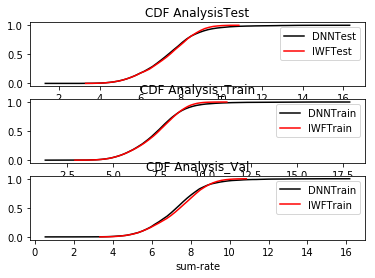

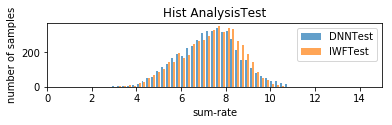

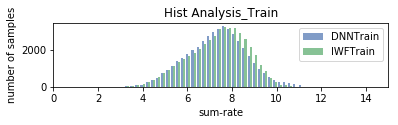

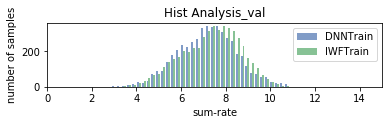

test:
Sum-rate: IWF: 7.326, DNN: 7.375
Ratio: DNN: 100.674%

Train:
Sum-rate: IWF: 7.352, DNN: 7.391
Ratio: DNN: 100.525%

Val:
Sum-rate: IWF: 7.338, DNN: 7.284
Ratio: DNN: 99.258%



0

In [22]:

trainPred=model6layers.predict(x_train)

# encoder_x_val=encoder.predict(x_val_standard)
valPred=model6layers.predict(x_val)

# encoder_x_test=encoder.predict(Xtest_standard)
ypred=model6layers.predict(Xtest)
D=12
M=2
N=2
K=3
# test
xtest=DABtoComplex(Xtest,D)
ytest=DABtoComplex(Ytest,D)
ypred=DABtoComplex(ypred,D)

# train & val
xtrain=DABtoComplex(x_train,D)
ytrain=DABtoComplex(y_train,D)
trainPred=DABtoComplex(trainPred,D)
xval=DABtoComplex(x_val,D)
yval=DABtoComplex(y_val,D)
valPred=DABtoComplex(valPred,D)

# # test
nnsumRate=obj_sum_rate(xtest, ypred,M,N,K, 5000)
IWFsumRate=obj_sum_rate(xtest, ytest,M,N,K, 5000)
#trian
nnSRTrain=obj_sum_rate(xtrain, trainPred,M,N,K, 45000)
IWFSRTrain=obj_sum_rate(xtrain, ytrain,M,N,K, 45000)
# validation
IWFSRVal=obj_sum_rate(xval, yval,M,N,K, 5000)
nnSRVal=obj_sum_rate(xval, valPred,M,N,K, 5000)

plt.figure(1)
plt.subplot(311)
plt.title('CDF AnalysisTest')
CDF_Plot(nnsumRate,IWFsumRate, 'DNNTest', 'IWFTest')
plt.subplot(312)
plt.title('CDF Analysis_Train')
CDF_Plot(nnSRTrain,IWFSRTrain, 'DNNTrain', 'IWFTrain')
plt.subplot(313)
plt.title('CDF Analysis_Val')
CDF_Plot(nnSRVal,IWFSRVal, 'DNNTrain', 'IWFTrain')

plt.figure(2)
plt.subplot(311)
plt.title('Hist AnalysisTest')
histPlot(nnsumRate,IWFsumRate, ['DNNTest', 'IWFTest'])
plt.subplot(312)
plt.title('Hist Analysis_Train')
histPlot(nnSRTrain,IWFSRTrain, ['DNNTrain', 'IWFTrain'])
plt.subplot(313)
plt.title('Hist Analysis_val')
histPlot(nnSRVal,IWFSRVal, ['DNNTrain', 'IWFTrain'])
print('test:')
performance(IWFsumRate, nnsumRate, 5000)
print('Train:')
performance(IWFSRTrain, nnSRTrain, 45000)
print('Val:')
performance(IWFSRVal, nnSRVal, 5000)

In [23]:
ytest=DABtoComplex(Ytest,D)
power_iwf=power(xtest,ytest,2,2,3,5000)

In [27]:
ypred=model6layers.predict(Xtest)
ypred=DABtoComplex(ypred,D)
power_nn=power(xtest,ypred,2,2,3,5000)

In [26]:
power_nn

[9.987479209899902,
 10.002043724060059,
 9.990353345870972,
 9.996602416038513,
 10.007895708084106,
 10.01125681400299,
 9.995838820934296,
 9.999659657478333,
 9.992607712745667,
 10.003607988357544,
 9.989024043083191,
 9.997057020664215,
 9.997639894485474,
 9.998283982276917,
 9.998049974441528,
 9.995180487632751,
 9.994689106941223,
 9.995676279067993,
 9.998929858207703,
 9.995711922645569,
 9.997918486595154,
 9.994606614112854,
 9.99593460559845,
 9.997496128082275,
 9.99916124343872,
 9.984682321548462,
 10.001285672187805,
 9.994825065135956,
 10.003146409988403,
 9.990673959255219,
 10.006720125675201,
 9.99529230594635,
 9.99569582939148,
 10.005566835403442,
 9.984709739685059,
 9.99742203950882,
 10.009389281272888,
 10.00162148475647,
 10.002407193183899,
 9.991846442222595,
 9.991049885749817,
 9.993383288383484,
 9.993844866752625,
 9.991955399513245,
 10.00278902053833,
 10.007452845573425,
 9.99663770198822,
 9.992327570915222,
 10.009635925292969,
 10.00894629955